# Задача 1
Найти вероятность того, что для данных 30 человек 6 из 12 месяцев года содержат по два дня рождения и 6 — по три.
## Теоритическое решение

Вероятность того, что ровно 6 месяцев имеют по 2 дня рождения, а остальные 6 — по 3 дня рождения среди 30 человек, вычисляется через модель равномерного распределения дней рождения по месяцам (игнорируя високосные годы и разную длину месяцев).

Общее число исходов
Каждый из 30 человек может родиться в любом из 12 месяцев, поэтому общее число исходов = $12^{30}$

Посчитаем числ о благоприятных исходов: выбираем 6 месяцев из 12 для 2 дней рождения = $C_{12}^6 = 924$. Таким образом выбрали месяцы в которых будет по 2 ДР, в остальных будет по 3.

Мы зафиксировали месяцы, теперь раставим людей по группам: 6 групп размером 2 и 6 групп размером 3. Формула разбиения на группы без учета порядка: $\frac{n!}{n_1!n_2!...n_m!}$. Получаем ,что число разбить людей по месяцам равно $\frac{30!}{(2!)^6(3!)^6} = \frac{826385373016328125}{2208245755649745670373376}$

Итого получаем, что вероятность того, что ровно 6 месяцев имеют по 2 дня рождения, а остальные 6 — по 3 дня рождения:

$P = C_{12}^6 * \frac{30!}{(2!)^6(3!)^6 12^{30}} = \frac{63631673722257265625}{184020479637478805864448} \approx 0.0003457858269232422$


In [10]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np


trials = 10_000_000
true_estimate = 0.0003457858269232422
res_lst = []
estimates_lst = []

for _ in  tqdm(range(trials)):

    months = [random.randint(1, 12) for _ in range(30)]

    counts = [0] * 12
    for m in months:
        counts[m - 1] += 1

    if counts.count(2) == 6 and counts.count(3) == 6:
        res_lst.append(1)
    else:
      res_lst.append(0)

probability = np.mean(res_lst)
print("\nОценка ответа:", probability)



100%|██████████| 10000000/10000000 [03:39<00:00, 45647.23it/s]



Оценка ответа: 0.0003413


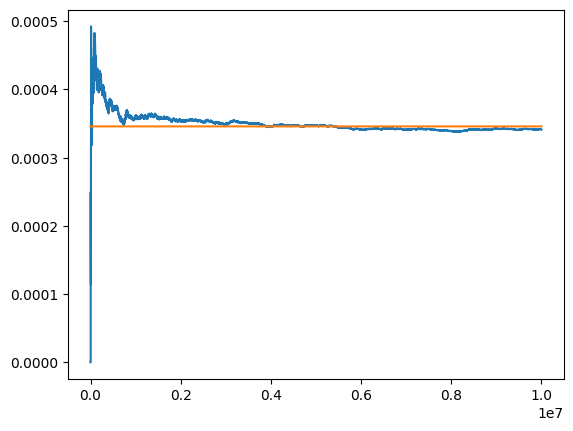

In [11]:
estimates_arr = np.cumsum(res_lst) / np.arange(1, len(res_lst) + 1)
plt.plot(estimates_arr)
plt.plot([true_estimate] * trials)

# Задача 2
Бросаются 5 игральных костей. Найти вероятность того, что
по меньшей мере на

а) двух; б) трех

из них выпадут одинаковые грани.

## Теоритическое решение
Бросаются 5 стандартных шестигранных игральных костей. Общее число возможных исходов равно $6^5 = 7776$

### а) По меньшей мере две одинаковые

Это дополнение к событию, когда все грани различны. Поэтому посчиатем число исходов со всеми различными гранями:
* Число сопосбов 5 разных чисел из 6 — $А(6,5) = \frac{6!}{(6-5)!} = 720$.
* Вероятность всех различных: $\frac{720}{7776} \approx 0.0926$.

Таким образом, вероятность хотя бы двух одинаковых: $1 - \frac{720}{7776} = \frac{5256}{7776} \approx 0.9074$.

### б) По меньшей мере три одинаковые

Это дополнение к объединению событий: все различны, есть ровно одна пара,есть две пары. Посчитаем число исходов в каждом:

- Все различны: $А(6,5) = \frac{6!}{(6-5)!} = 720$.

- Ровно одна пара: Выбрать число для пары — $C_6^1 = 6$; выбрать 2 позиции из 5 для пары — $C_5^2 = 10$; для оставшихся 3 костей выбрать 3 разных числа из оставшихся 5 и распределить — $A_5^3 = 60$. Итого: $6 * 10 * 60 = 3600$

- Две пары: Выбрать 2 числа для пар — $C_6^2 = 15$; выбрать позиции: сначала для первой пары $C_5^2 = 10, для второй C_3^2 = 3$; для оставшейся кости — 4 числа. Получаем $15 * 10 * 3 * 4 = 1800$

Итого, вычитая дополнения:  $1 - \frac{720 + 3600 + 1800}{7776} = 1656/7776 \approx 0.2129$

In [12]:
import random

trials = 1_000_000
n_dice = 5

res_a_lst = []
res_b_lst = []

for _ in tqdm(range(trials)):
    roll = [random.randint(1, 6) for _ in range(n_dice)]

    max_freq = np.max(np.unique(roll, return_counts=True)[1])

    if max_freq >= 2:
        res_a_lst.append(1)
    else:
      res_a_lst.append(0)

    if max_freq >= 3:
        res_b_lst.append(1)
    else:
      res_b_lst.append(0)


p_a = np.mean(res_a_lst)
p_b = np.mean(res_b_lst)

print(f"а) 2 и более одтнаковые: {p_a:.6f}")
print(f"б) 3 и более одтнаковые: {p_b:.6f}")


100%|██████████| 1000000/1000000 [00:36<00:00, 27718.50it/s]


а) 2 и более одтнаковые: 0.907676
б) 3 и более одтнаковые: 0.213582


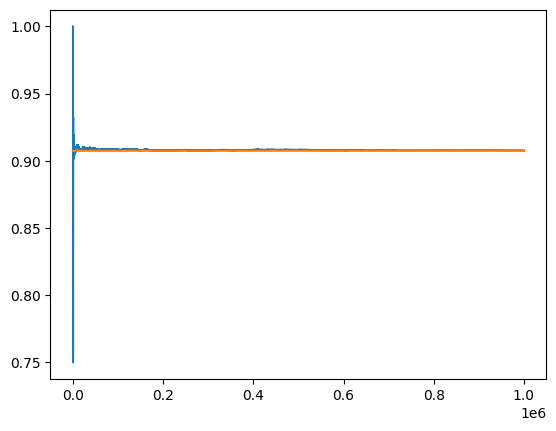

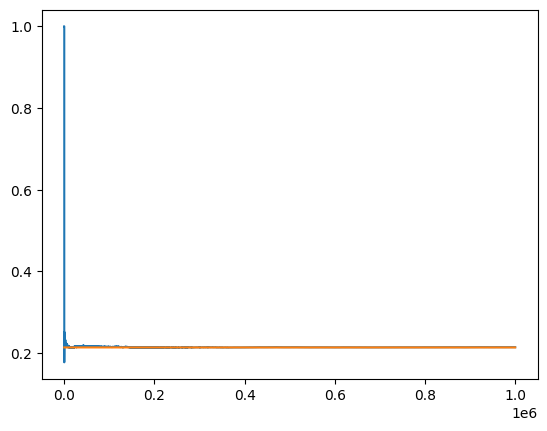

In [13]:
true_estimate = 0.9074
estimates_arr = np.cumsum(res_a_lst) / np.arange(1, len(res_a_lst) + 1)
plt.plot(estimates_arr)
plt.plot([true_estimate] * trials)
plt.show()

true_estimate = 0.2129
estimates_arr = np.cumsum(res_b_lst) / np.arange(1, len(res_a_lst) + 1)
plt.plot(estimates_arr)
plt.plot([true_estimate] * trials)
plt.show()

## Задача 3
Стержень длины l наудачу разламывается на две части, после
чего большая из частей опять разламывается надвое в наудачу выбранной точке. Найти вероятность того, что из полученных частей можно
составить треугольник.
### Теоритическое решение

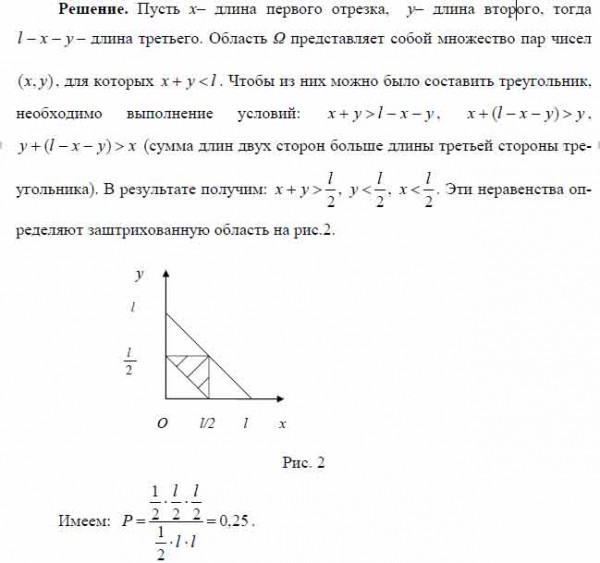

In [14]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

trials = 1_000_000
res_lst = []
true_estimate = 0.25
l = 1

for _ in tqdm(range(trials)):
  a = np.random.uniform(0, l)
  b = np.random.uniform(0, l)

  x = min(a, b)
  y = max(a, b) - min(a, b)
  z = 1 - max(a, b)

  if x < y+z and y < x+z and z < x+y:
    res_lst.append(1)
  else:
    res_lst.append(0)

probability = np.mean(res_lst)
print("\nОценка ответа:", probability)

100%|██████████| 1000000/1000000 [00:08<00:00, 116864.01it/s]



Оценка ответа: 0.250061


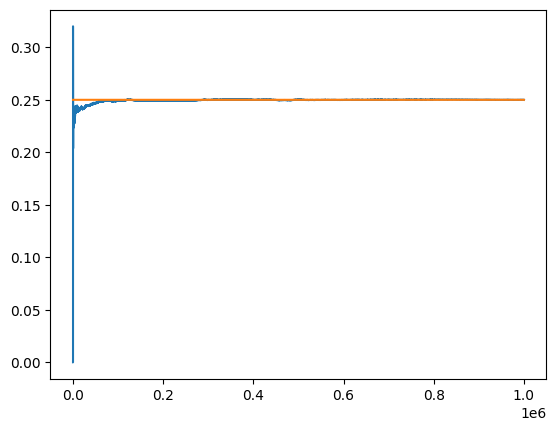

In [15]:
estimates_arr = np.cumsum(res_lst) / np.arange(1, len(res_lst) + 1)
plt.plot(estimates_arr)
plt.plot([true_estimate] * trials)